Enter the number of nodes for the cycle graph:  5


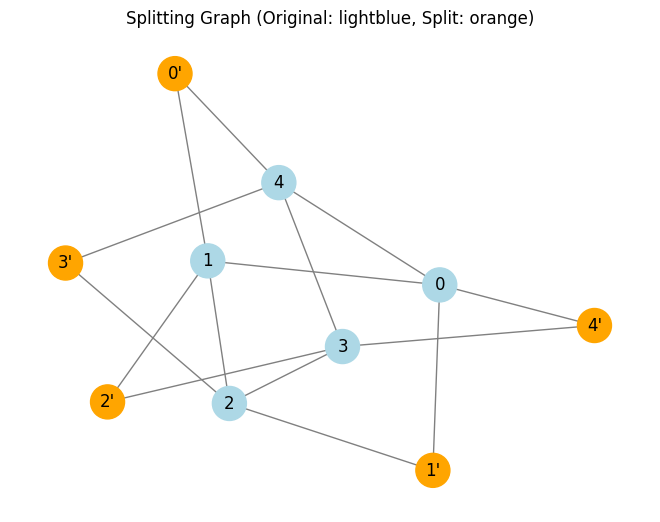


Independent sets V_i (|V_i| ≥ 1):
V_0: [0]
V_1: [1]
V_2: [2]
V_3: [3]
V_4: [4]
V_5: ["0'"]
V_6: ["1'"]
V_7: ["2'"]
V_8: ["3'"]
V_9: ["4'"]
V_10: [0, 2]
V_11: [0, 3]
V_12: [0, "0'"]
V_13: [0, "2'"]
V_14: [0, "3'"]
V_15: [1, 3]
V_16: [1, 4]
V_17: [1, "1'"]
V_18: [1, "3'"]
V_19: [1, "4'"]
V_20: [2, 4]
V_21: ["0'", 2]
V_22: [2, "2'"]
V_23: [2, "4'"]
V_24: ["0'", 3]
V_25: ["1'", 3]
V_26: [3, "3'"]
V_27: ["1'", 4]
V_28: ["2'", 4]
V_29: [4, "4'"]
V_30: ["0'", "1'"]
V_31: ["0'", "2'"]
V_32: ["0'", "3'"]
V_33: ["0'", "4'"]
V_34: ["1'", "2'"]
V_35: ["1'", "3'"]
V_36: ["1'", "4'"]
V_37: ["2'", "3'"]
V_38: ["2'", "4'"]
V_39: ["3'", "4'"]
V_40: [0, "0'", 2]
V_41: [0, 2, "2'"]
V_42: [0, "0'", 3]
V_43: [0, 3, "3'"]
V_44: [0, "0'", "2'"]
V_45: [0, "0'", "3'"]
V_46: [0, "2'", "3'"]
V_47: [1, "1'", 3]
V_48: [1, 3, "3'"]
V_49: [1, "1'", 4]
V_50: [1, 4, "4'"]
V_51: [1, "1'", "3'"]
V_52: [1, "1'", "4'"]
V_53: [1, "3'", "4'"]
V_54: [2, "2'", 4]
V_55: [2, 4, "4'"]
V_56: ["0'", 2, "2'"]
V_57: ["0'", 2, "4'"]

In [1]:
import networkx as nx
import networkx.algorithms.matching as nxmatch
import itertools
import matplotlib.pyplot as plt

def generate_cycle_graph(n):
    return nx.cycle_graph(n)

def splitting_graph(G):
    Spl = nx.Graph()
    original_nodes = list(G.nodes())
    split_nodes = []
    Spl.add_nodes_from(original_nodes)
    Spl.add_edges_from(G.edges())
    for v in original_nodes:
        v_prime = f"{v}'"
        split_nodes.append(v_prime)
        Spl.add_node(v_prime)
        for neighbor in G.neighbors(v):
            Spl.add_edge(v_prime, neighbor)

    return Spl, original_nodes, split_nodes

def is_independent_set(G, nodes):
    for u, v in itertools.combinations(nodes, 2):
        if G.has_edge(u, v):
            return False
    return True

def find_all_independent_sets(G):
    nodes = list(G.nodes)
    independent_sets = []
    for r in range(1, len(nodes) + 1):  
        for subset in itertools.combinations(nodes, r):
            if is_independent_set(G, subset):
                independent_sets.append(set(subset))
    return independent_sets

def find_all_matchings(G):
    edges = list(G.edges)
    matchings = []
    for r in range(1, len(edges) + 1):
        for subset in itertools.combinations(edges, r):
            if nxmatch.is_matching(G, subset):
                matchings.append(set(subset))
    return matchings

def get_vertices_from_edges(edges):
    return set(u for edge in edges for u in edge)

def is_vertex_edge_disjoint(G, V_i, E_i):
    for v in V_i:
        for u, w in E_i:
            if G.has_edge(v, u) or G.has_edge(v, w):
                return False
    return True

def find_valid_T_sets(independent_sets, matchings, G):
    T_sets = []
    for i, V_i in enumerate(independent_sets):
        for j, E_i in enumerate(matchings):
            if len(V_i) > 0 and len(E_i) > 0:  # keep both non-empty; adjust if needed
                edge_vertices = get_vertices_from_edges(E_i)
                if V_i.isdisjoint(edge_vertices) and is_vertex_edge_disjoint(G, V_i, E_i):
                    T_sets.append((i, j, V_i, E_i))
    return T_sets

def filter_T_sets_by_size_proximity(T_sets):
    T_sizes = [len(V_i) + len(E_i) for (_, _, V_i, E_i) in T_sets]
    filtered_T = []

    for idx, (i, j, V_i, E_i) in enumerate(T_sets):
        size_i = T_sizes[idx]
        if any(abs(size_i - size_j) <= 1 for k, size_j in enumerate(T_sizes) if k != idx):
            filtered_T.append((i, j, V_i, E_i))
    
    return filtered_T

def visualize_graph(G, original_nodes, split_nodes):
    pos = nx.spring_layout(G, seed=42)
    node_colors = []
    for node in G.nodes():
        if node in original_nodes:
            node_colors.append('lightblue')
        elif node in split_nodes:
            node_colors.append('orange')
        else:
            node_colors.append('gray')

    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=600)
    plt.title("Splitting Graph (Original: lightblue, Split: orange)")
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    n = int(input("Enter the number of nodes for the cycle graph: "))
    base_graph = generate_cycle_graph(n)
    G, original_nodes, split_nodes = splitting_graph(base_graph)
    visualize_graph(G, original_nodes, split_nodes)

    independent_sets = find_all_independent_sets(G)
    matchings = find_all_matchings(G)

    print(f"\nIndependent sets V_i (|V_i| ≥ 1):")
    for i, V_i in enumerate(independent_sets):
        print(f"V_{i}: {sorted(V_i, key=str)}")

    print(f"\nMatchings E_i (|E_i| ≥ 1):")
    for j, E_i in enumerate(matchings):
        print(f"E_{j}: {sorted(E_i, key=lambda e: (str(e[0]), str(e[1])))}")

    T_sets_all = find_valid_T_sets(independent_sets, matchings, G)
    T_sets = filter_T_sets_by_size_proximity(T_sets_all)

    print(f"\nFiltered T_i = V_i ∪ E_i where V_i, E_i non-empty, disjoint and non-incident ({len(T_sets)} total):")
    for idx, (i, j, V_i, E_i) in enumerate(T_sets):
        print(f"T_{idx}: V_{i} ∪ E_{j} = {{Vertices: {sorted(V_i, key=str)}, Edges: {sorted(E_i, key=lambda e: (str(e[0]), str(e[1])))}}}")